## LInear Regrassion Model: Boston Housing

### Import python liabraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import linear_model

### Load Boston housing data sets from sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Keys: ", boston.keys(), "\n")
print ("Feature Names: ", boston['feature_names'],"\n")
print (boston['DESCR'])

Keys:  dict_keys(['DESCR', 'data', 'feature_names', 'target']) 

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
    

### Create DataFrame from numpy arrays for the features and the housing price; then join the two DataFrams using the inner join 

In [15]:
df1 = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
df2 = pd.DataFrame(data=boston['target'],columns=['PRICE'])
df = pd.concat([df1,df2],axis=1) 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploratory data analysis using seabon pairplot

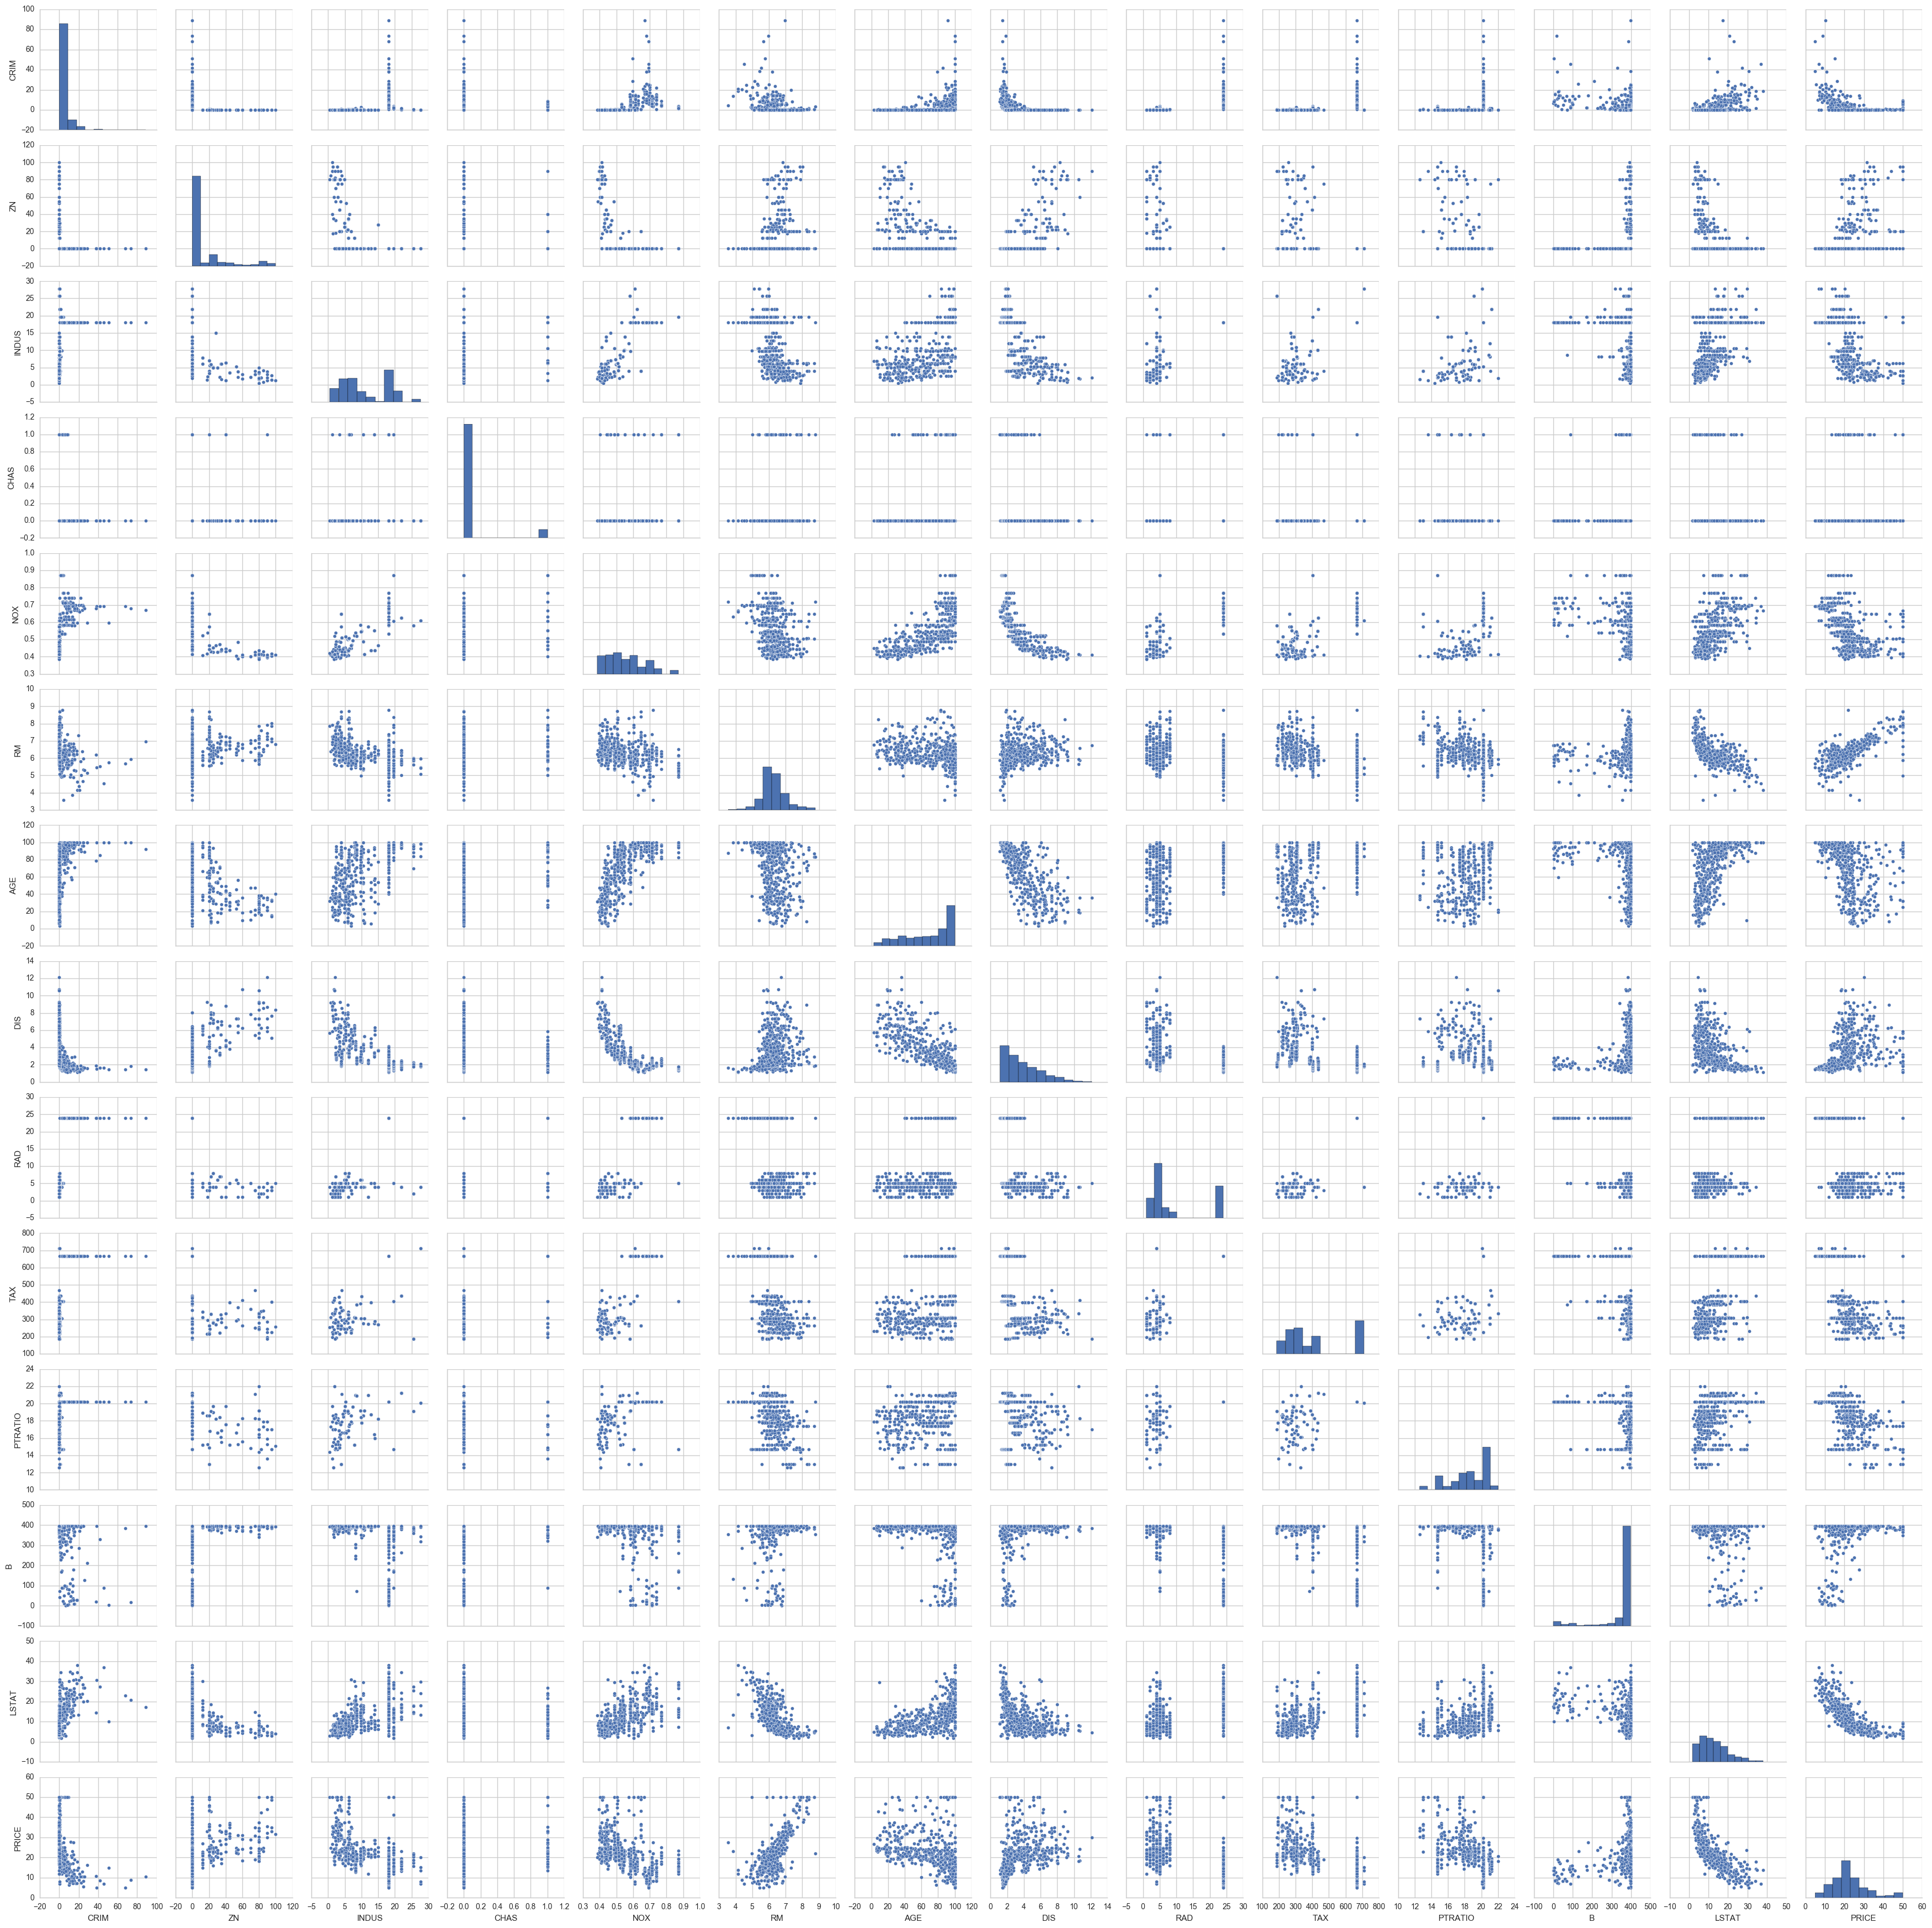

In [4]:
sns.set_style('whitegrid')
sns.pairplot(df)

### Histogram of the housing price

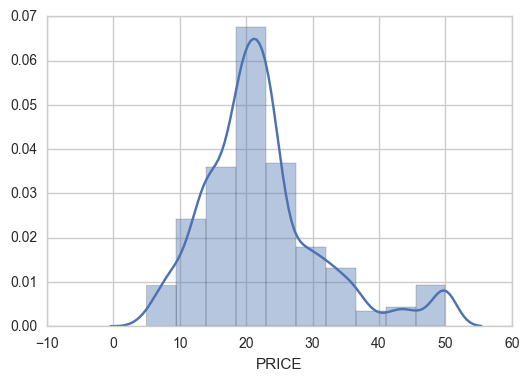

In [5]:
sns.distplot(df['PRICE'],bins=10)

### Compute pairwise correlation of columns

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Make heatmap of the correlation between all the columns

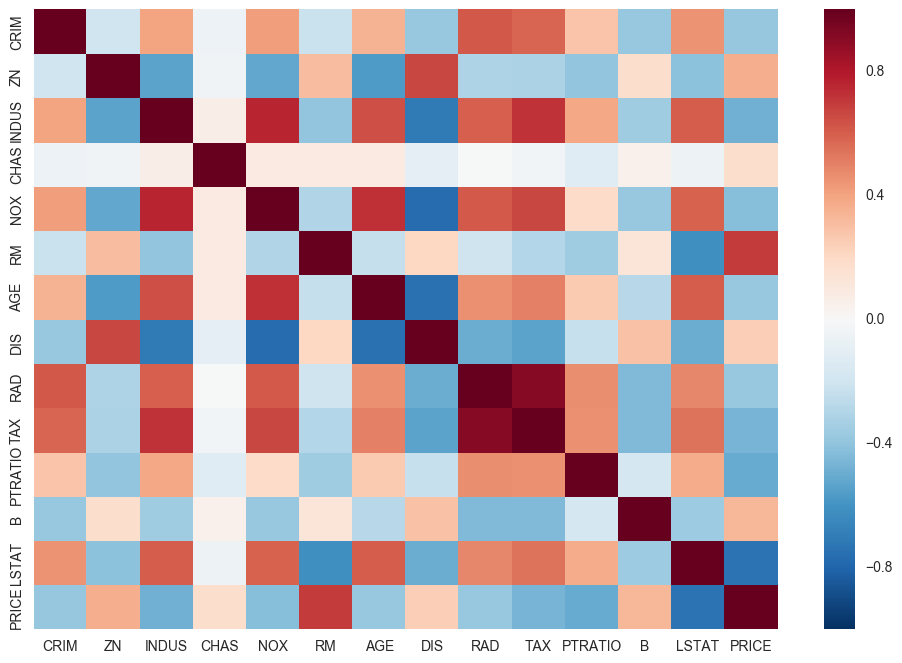

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

### To obtain the columns name

### Import the Linear regression model 
### Split the data into train and test sets
### Fit the training data to a Linear Regression model
### Print the intercept and coefficeints 


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
linear_model = LinearRegression()
X = df.drop('PRICE',axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
linear_model.fit(X_train,y_train)
print('Intercept: ',linear_model.intercept_)
#print(linear_model.coef_)
pd.DataFrame(linear_model.coef_,X.columns,columns=['Coeff'])

Intercept:  40.2660512371


,Coeff
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


### Predict the housing price using the test data set
### Make a parity pair plot of actual housing price and predicted housing price

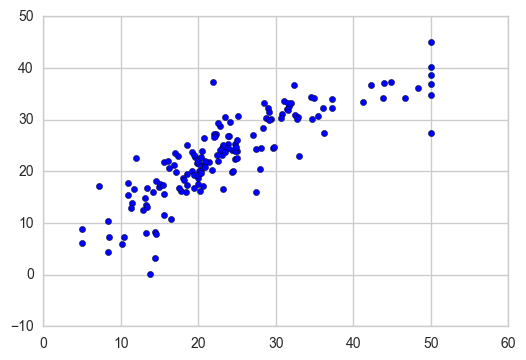

In [19]:
predict_price = linear_model.predict(X_test)
plt.scatter(y_test,predict_price)

### Histogram of the difference between the actual and predicted housing prices

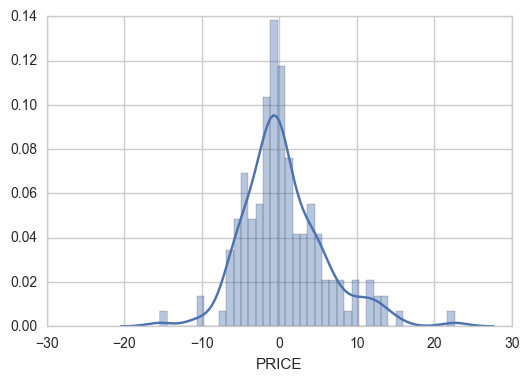

In [20]:
sns.distplot(y_test - predict_price, bins=40)

### Error calculations using Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

In [21]:
MAE = metrics.mean_absolute_error(y_test,predict_price)
MSE = metrics.mean_squared_error(y_test,predict_price)
RMSE = np.sqrt(MSE) 
print ("Mean Absolute Error: ", MAE)
print ("Mean Squared Error: ", MSE)
print ("Root Mean Squared Error: ", RMSE)


Mean Absolute Error:  3.83652813773
Mean Squared Error:  28.5511487657
Root Mean Squared Error:  5.34332749938
